# Ankush Dey    Roll:- MDS202108

# Anjali Pugalia Roll:- MDS202107

## Importing the Libraries 

In [2]:
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import models, layers, losses, metrics, callbacks, datasets
from tensorflow.keras.utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
seed=42
tf.random.set_seed(seed)

In [2]:
tf.__version__

'2.9.0'

In [3]:
keras.__version__

'2.9.0'

## Loading the Data 

In [4]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()
X_train, X_test= X_train/255.0, X_test/255.0

# Preprocessing of the Data

In [5]:
X_train_flatten= X_train.reshape(X_train.shape[0],-1)
y_train_flatten= y_train.reshape(y_train.shape[0],-1)
X_test_flatten= X_test.reshape(X_test.shape[0],-1)
y_test_flatten= y_test.reshape(y_test.shape[0],-1)

In [6]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle Boot']

In [7]:
X_train_flatten.shape

(60000, 784)

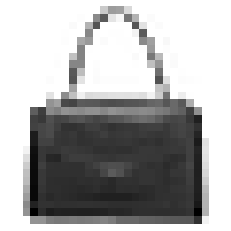

It is a  Bag


In [8]:
index=654
plt.imshow(X_train[index],cmap='binary')
plt.axis('off')
plt.show()

print('It is a ',class_names[y_train[index]])

#  Experiment with Logistic Regression


## Checking the Accuracy for entire labelled Data

In [9]:
%load_ext memory_profiler
start=time.time()
log_reg1 = LogisticRegression(multi_class="ovr", solver="saga", max_iter=500, random_state=seed)
%memit log_reg1.fit(X_train_flatten, y_train_flatten.ravel())
end=time.time()
print("time=",end-start, "Sec")

peak memory: 755.56 MiB, increment: 0.41 MiB
2722.2644176483154


In [24]:
print(str(log_reg1.score(X_test_flatten, y_test_flatten)*100)+'%')

84.11%


##  Checking the Accuracy for entire labelled Data using clustering

In [11]:
start=time.time()
k=[100,200,300]
pipeline=np.empty(len(k),dtype=object)
for i in range(len(k)):
    pipeline[i] = Pipeline([("kmeans", KMeans(init='k-means++',n_clusters=k[i], random_state=seed)),
                         ("log_reg", LogisticRegression(multi_class="ovr", solver="saga",
                                                        max_iter=500, random_state=seed))])
    %memit pipeline[i].fit(X_train_flatten, y_train_flatten.ravel())
    print('Cluster= {}, Accuracy= {}'.format(k[i],
            pipeline[i].score(X_test_flatten,y_test_flatten)*100))
end=time.time()
print("time=",end-start, "Sec")

peak memory: 1410.02 MiB, increment: 714.32 MiB
Cluster= 100, Accuracy= 81.81
peak memory: 1273.77 MiB, increment: 577.17 MiB
Cluster= 200, Accuracy= 82.50999999999999
peak memory: 1304.77 MiB, increment: 600.12 MiB
Cluster= 300, Accuracy= 83.06
2240.276414871216


## Taking Random Labeled instance

In [13]:
start=time.time()
k=[500,1000,2000]
log_reg2=np.empty(len(k),dtype=object)
for i in range(len(k)):
    log_reg2[i] = LogisticRegression(multi_class="ovr", solver="saga", random_state=seed)
    %memit log_reg2[i].fit(X_train_flatten[:k[i]], y_train_flatten[:k[i]].ravel())
    print('Labelled Instance= {}, Accuracy= {}'.format(k[i],
            log_reg2[i].score(X_test_flatten,y_test_flatten.ravel())*100))
end=time.time()
print("time=",end-start, "Sec")  

peak memory: 672.77 MiB, increment: 0.00 MiB
Labelled Instance= 500, Accuracy= 78.52
peak memory: 672.77 MiB, increment: 0.00 MiB
Labelled Instance= 1000, Accuracy= 79.24
peak memory: 672.78 MiB, increment: 0.01 MiB
Labelled Instance= 2000, Accuracy= 80.89
21.57460904121399


In [14]:
start=time.time()
kmeans1 = KMeans(init='k-means++',n_clusters=2000, random_state=seed)
%memit X_items_dist = kmeans1.fit_transform(X_train_flatten)
representative_items_idx = np.argmin(X_items_dist, axis=0)
X_representative_items = X_train_flatten[representative_items_idx]
y_representative_items = np.squeeze(y_train_flatten[representative_items_idx]).astype('int32')
end=time.time()
print("time=",end-start, "Sec")

peak memory: 2248.20 MiB, increment: 1575.20 MiB
1000.8680164813995


In [15]:
y_representative_items = np.squeeze(y_train_flatten[representative_items_idx]).astype('int32')
print(np.array(class_names)[y_representative_items])

['Ankle Boot' 'T-shirt/top' 'T-shirt/top' ... 'Bag' 'Trouser' 'Ankle Boot']


In [16]:
start=time.time()
log_reg3 = LogisticRegression(multi_class="ovr", solver="saga", max_iter=500, random_state=seed)
%memit log_reg3.fit(X_representative_items, y_representative_items)
print('Accuracy= ',log_reg3.score(X_test_flatten, y_test_flatten)*100)
end=time.time()
print("time=",end-start, "Sec")

peak memory: 1473.57 MiB, increment: 1.76 MiB
Accuracy=  81.75
time= 59.715059757232666


In [30]:
y_train_propagated = np.empty(len(X_train_flatten), dtype=np.int32)
for i in range(2000):
    y_train_propagated[kmeans1.labels_==i] = y_representative_items[i]

In [18]:
start=time.time()
log_reg4 = LogisticRegression(multi_class="ovr", solver="saga", max_iter=500, random_state=seed)
%memit log_reg4.fit(X_train_flatten, y_train_propagated)
print(log_reg4.score(X_test_flatten,y_test_flatten)*100)
end=time.time()
print("time=",end-start, "Sec")

peak memory: 1538.23 MiB, increment: 1.70 MiB
81.21000000000001
1899.7162182331085


## propagating the labels to the 20% of the instances that are closest to the centroids

In [27]:
percentile_closest = 20

X_cluster_dist = X_items_dist[np.arange(len(X_train_flatten)), kmeans1.labels_]
for i in range(2000):
    in_cluster = (kmeans1.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [28]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train_flatten[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [29]:
start=time.time()
log_reg5 = LogisticRegression(multi_class="ovr", solver="saga", max_iter=500, random_state=seed)
%memit log_reg5.fit(X_train_partially_propagated, y_train_partially_propagated)
print(log_reg5.score(X_test_flatten,y_test_flatten)*100)
end=time.time()
print("time=",end-start, "Sec")

peak memory: 918.00 MiB, increment: 1.21 MiB
80.46
time= 452.9709997177124 Sec


In [31]:
percentile_closest = 50

X_cluster_dist = X_items_dist[np.arange(len(X_train_flatten)), kmeans1.labels_]
for i in range(2000):
    in_cluster = (kmeans1.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [32]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train_flatten[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [33]:
start=time.time()
log_reg5 = LogisticRegression(multi_class="ovr", solver="saga", max_iter=5000, random_state=seed)
%memit log_reg5.fit(X_train_partially_propagated, y_train_partially_propagated)
print(log_reg5.score(X_test_flatten,y_test_flatten)*100)
end=time.time()
print("time=",end-start, "Sec")

peak memory: 852.18 MiB, increment: 2.36 MiB
80.9
time= 2205.8227908611298 Sec


In [34]:
percentile_closest = 75

X_cluster_dist = X_items_dist[np.arange(len(X_train_flatten)), kmeans1.labels_]
for i in range(2000):
    in_cluster = (kmeans1.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [35]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train_flatten[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [36]:
start=time.time()
log_reg5 = LogisticRegression(multi_class="ovr", solver="saga", max_iter=5000, random_state=seed)
%memit log_reg5.fit(X_train_partially_propagated, y_train_partially_propagated)
print(log_reg5.score(X_test_flatten,y_test_flatten)*100)
end=time.time()
print("time=",end-start, "Sec")

peak memory: 1068.12 MiB, increment: 0.48 MiB
81.26
time= 2886.410164117813 Sec
